In [2]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached keras-3.11.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/375.9 MB 2.0 MB/s eta 0:03:04
   ---------------------------------------- 0.0/375.9 MB 2.0 MB/s eta 0:03:04
   --------

In [3]:
data_dir = r'D:\desktop bk\6th semester\technopreneurship\project\picsniff\Training Faces'

In [6]:
dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(64, 64),  # Increased image size for better feature recognition
    batch_size=8,  # Reduced batch size due to small dataset
    shuffle=True
)

Found 31 files belonging to 3 classes.
Using 25 files for training.


In [7]:
val_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(64, 64),
    batch_size=8,
    shuffle=True
)

Found 31 files belonging to 3 classes.
Using 6 files for validation.


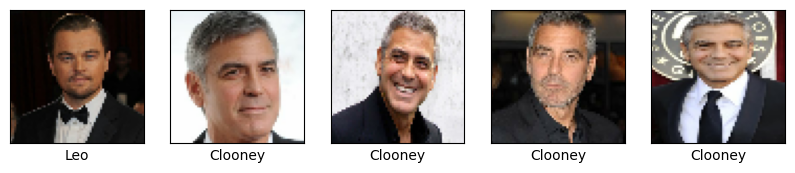

In [8]:
# Define the class names
class_names = dataset.class_names

# Visualize the first 5 images from the training set
plt.figure(figsize=(10, 5))
for images, labels in dataset.take(1):
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.xlabel(class_names[labels[i]])
plt.show()

In [9]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(class_names))
])


C:\Users\Aamna\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:

# Train the model
history = model.fit(dataset, epochs=20,  # Increased epochs for better training with small dataset
                    validation_data=val_dataset)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.2800 - loss: 54.0794 - val_accuracy: 0.3333 - val_loss: 28.5909
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3200 - loss: 29.1052 - val_accuracy: 0.5000 - val_loss: 3.7810
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4800 - loss: 5.2361 - val_accuracy: 0.3333 - val_loss: 5.2735
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4400 - loss: 3.0777 - val_accuracy: 0.5000 - val_loss: 1.4414
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8000 - loss: 0.6480 - val_accuracy: 0.3333 - val_loss: 2.0881
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9200 - loss: 0.3018 - val_accuracy: 0.3333 - val_loss: 3.2182
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9600 - loss: 0.1031 - val_accuracy: 0.3333 - val_loss: 4.0158
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9200 - loss: 0.1603 - val_accuracy: 0.3333 - val_loss: 4.3

In [12]:
#Evaluate the model
test_loss, test_acc = model.evaluate(val_dataset, verbose=2)
print(f'\nTest accuracy: {test_acc}')

1/1 - 0s - 74ms/step - accuracy: 0.5000 - loss: 3.9444

Test accuracy: 0.5


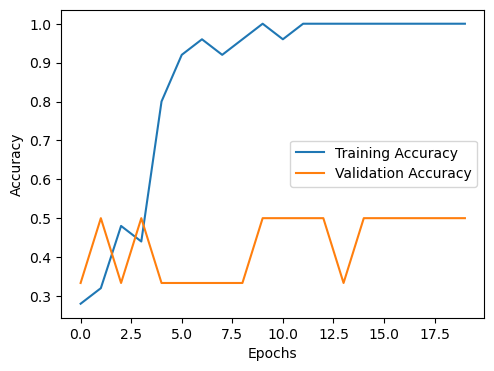

In [13]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

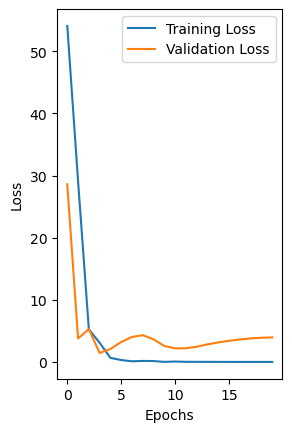

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [15]:
plt.show()